# Linear Regression

Term 1 2020 - Instructor: Teerapong Leelanupab

Teaching Assistant: 
1. Tiwipab Meephruek (Mil)
2. Jiratkul Wangsiripaisarn (Brooklyn)
3. Hataichanok Sakkara (Pond)
***

*Regression analysis* is a common statistical process for estimating the relationships between variables. This can allow us to make numeric predictions based on past data. *Simple Linear Regression* predicts a numeric response variable based on a single input variable (feature).

### Example 1: Simple Linear Regression

To demonstrate the use of simple linear regression with sci-kit learn, we will first create sample data in the form of NumPy arrays.

In [1]:
import numpy as np
np.random.seed(0)
x = np.random.random(size=(15, 1))
y = 3 * x.flatten() + 2 + np.random.randn(15)

First, let's plot the data using Matplotlib:

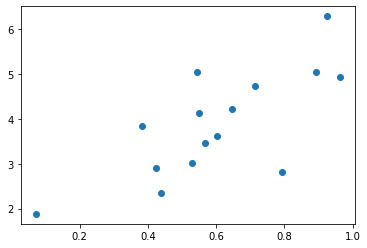

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y, 'o')

Apply simple linear regression to learn (fit) the model, where *x* is our input variable and *y* is the target variable that we would like to learn how to predict:

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Display the model parameters that we have learned: 

In [4]:
print("Model intercept is", model.intercept_)
print("Model slope is", model.coef_[0])

Model intercept is 1.616324897289012
Model slope is 3.7615975756980484


This model can now be use to make predictions for *y* given new values of *x*:

In [5]:
x_unseen =  np.array([0.78])
#Note that for predicting a single sample you can either use array.reshape(1, -1), but array.reshape(-1, 1) can be used for either a single sample or a single feature.   
model.predict(x_unseen.reshape(-1, 1)) #ปรับ shapeให้ numpy คิดเองว่าข้อมูลเรามีกี่มิติ

array([4.55037101])

In [6]:
x_unseen =  np.array([0.78, 0.92])
model.predict(x_unseen.reshape(-1, 1))

array([4.55037101, 5.07699467])

Plot the data and the model prediction (i.e. the regression line):

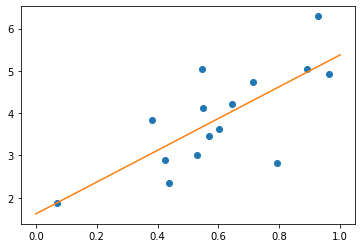

In [7]:
# create predictions which we will use to generate our line
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)
# plot the data
plt.plot(x.flatten(), y, 'o')
# plot the line
plt.plot(X_fit, y_fit)

### Example 2: Simple Linear Regression
As a second example, we will examine a dataset of 244 meals, with details of total meal bill and tip amount.

In [8]:
import pandas as pd
df = pd.read_csv("data/tips.csv")
len(df)

244

In [9]:
df.head(5)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


First, let's plot the data using Matplotlib:

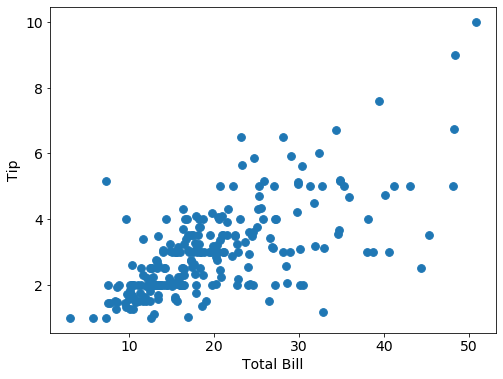

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
p = df.plot.scatter("total_bill","tip", s=60, figsize=(8,6), fontsize=14)
plt.xlabel('Total Bill', fontsize=14)
plt.ylabel('Tip', fontsize=14);

From the above, it seems there is a reasonably strong relationship. Let's quantify the level of correlation between the two variables.

In [11]:
df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


We could also look at a boxplot of the data, to see if there are outlying values:

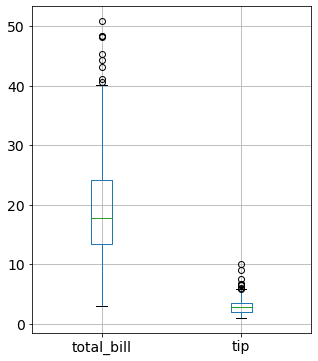

In [12]:
df.boxplot(figsize=(5,6), fontsize=14);

Now, apply simple linear regression to learn (fit) the model, where *x* (the total bill) is our independent variable and *y* (the tip amount) is the target variable that we would like to learn how to predict:

In [13]:
# Note, we need to extract the columns as DataFrames, not series
x = df[["total_bill"]].values
y = df[["tip"]].values

In [14]:
# Now build the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Look at the parameters of the model we learned (the regression line):

In [15]:
print("Model intercept is", model.intercept_)
print("Model slope is", model.coef_[0])

Model intercept is [0.92026961]
Model slope is [0.10502452]


Now let's plot the data again, adding our regression line

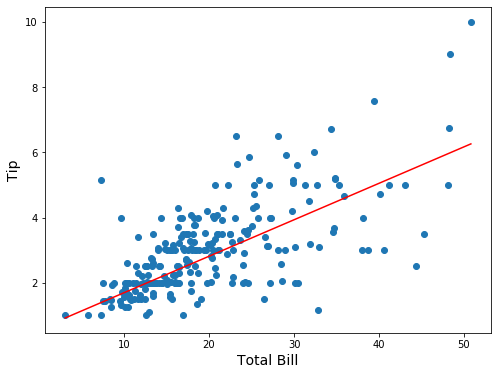

In [16]:
# plot the data
plt.figure(figsize=(8,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('Total Bill', fontsize=14)
plt.ylabel('Tip', fontsize=14);

We can make predictions from this model:

In [17]:
bills = np.arange( 10, 70, 5 )
predict_tips = model.predict(bills.reshape(-1, 1))
for i in range(bills.size):
    print("Predicted tip for meal costing %.2f = %.2f" % ( bills[i],  predict_tips[i] ) )

Predicted tip for meal costing 10.00 = 1.97
Predicted tip for meal costing 15.00 = 2.50
Predicted tip for meal costing 20.00 = 3.02
Predicted tip for meal costing 25.00 = 3.55
Predicted tip for meal costing 30.00 = 4.07
Predicted tip for meal costing 35.00 = 4.60
Predicted tip for meal costing 40.00 = 5.12
Predicted tip for meal costing 45.00 = 5.65
Predicted tip for meal costing 50.00 = 6.17
Predicted tip for meal costing 55.00 = 6.70
Predicted tip for meal costing 60.00 = 7.22
Predicted tip for meal costing 65.00 = 7.75


In [18]:
#Or    
for bill in bills:
    predict_tip = model.predict(bill.reshape(-1,1))
    print("Predicted tip for meal costing %.2f = %.2f" % ( bill,  predict_tip ) )

Predicted tip for meal costing 10.00 = 1.97
Predicted tip for meal costing 15.00 = 2.50
Predicted tip for meal costing 20.00 = 3.02
Predicted tip for meal costing 25.00 = 3.55
Predicted tip for meal costing 30.00 = 4.07
Predicted tip for meal costing 35.00 = 4.60
Predicted tip for meal costing 40.00 = 5.12
Predicted tip for meal costing 45.00 = 5.65
Predicted tip for meal costing 50.00 = 6.17
Predicted tip for meal costing 55.00 = 6.70
Predicted tip for meal costing 60.00 = 7.22
Predicted tip for meal costing 65.00 = 7.75


We can also compare the outputs of our model, with the original data to see if it agrees (note: normally we would use a separate test dataset in a real evaluation).

In [19]:
# Let's just look at the first few rows
for i in range(10):
    test_x = x[i][0]
    actual_y = y[i][0]
    predict_y = model.predict(test_x.reshape(-1,1))
    print("For meal costing %.2f. Predicted tip = %.2f, Actual tip = %.2f"  %( test_x, predict_y, actual_y ) )

For meal costing 16.99. Predicted tip = 2.70, Actual tip = 1.01
For meal costing 10.34. Predicted tip = 2.01, Actual tip = 1.66
For meal costing 21.01. Predicted tip = 3.13, Actual tip = 3.50
For meal costing 23.68. Predicted tip = 3.41, Actual tip = 3.31
For meal costing 24.59. Predicted tip = 3.50, Actual tip = 3.61
For meal costing 25.29. Predicted tip = 3.58, Actual tip = 4.71
For meal costing 8.77. Predicted tip = 1.84, Actual tip = 2.00
For meal costing 26.88. Predicted tip = 3.74, Actual tip = 3.12
For meal costing 15.04. Predicted tip = 2.50, Actual tip = 1.96
For meal costing 14.78. Predicted tip = 2.47, Actual tip = 3.23


### Example 3: Simple Linear Regression
As a third example of simple linear regression, we will load a CSV dataset related to product advertising. Would like to analyse the relationship between budget spent on different advertising media and product sales.

In [36]:
import pandas as pd
df = pd.read_csv("data/advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
Example,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Will will try building a simple linear model to predict Sales based on the TV budget spend:

In [37]:
model = LinearRegression()
# create a copy of the data frame, with a single input variable
x = df[["TV"]]
# fit the model based on the original response variable
model.fit(x,df["Sales"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print("Model intercept is", model.intercept_)
print("Model slope is", model.coef_[0])

Model intercept is 7.032593549127693
Model slope is 0.047536640433019764


Let's try to predict the first five values of the original data (note: normally we would use a separate test dataset in a real evaluation).

In [23]:
test_x = x[0:5]
model.predict(test_x)

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814])

When we compare the predictons to the actual sales values for the first 5 rows, we see there are some errors:

In [24]:
df["Sales"][0:5]

Example
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

We can create a plot that shows how the regression line fits to the data for this feature:

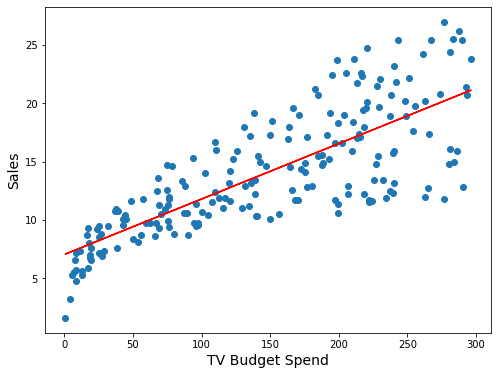

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV Budget Spend",fontsize=14)
plt.ylabel("Sales",fontsize=14)
# add the predictions from regression
plt.plot(df["TV"], model.predict(x), color="red")
plt.show()

We can now use this to make predictions

In [26]:
budgets = np.arange( 0, 400, 50 )
for spend in budgets:
    predict_sales = model.predict(spend.reshape(-1,1))
    print("Predicted sales for TV advertising spend of %.2f = %.2f" % ( spend,  predict_sales ) )

Predicted sales for TV advertising spend of 0.00 = 7.03
Predicted sales for TV advertising spend of 50.00 = 9.41
Predicted sales for TV advertising spend of 100.00 = 11.79
Predicted sales for TV advertising spend of 150.00 = 14.16
Predicted sales for TV advertising spend of 200.00 = 16.54
Predicted sales for TV advertising spend of 250.00 = 18.92
Predicted sales for TV advertising spend of 300.00 = 21.29
Predicted sales for TV advertising spend of 350.00 = 23.67


We can calculate the overall *mean squared error* between the predictions and the actual sales data. This gives us an idea of how well the model based on TV budget predicts sales.

In [27]:
np.mean((df["Sales"] - model.predict(x)) ** 2)

10.512652915656753

We can repeat the same process using a different features, such as newspaper budget spend:

In [28]:
# extract the relevant column
x = df[["Newspaper"]]
# build the model
model = LinearRegression()
model.fit(x,df["Sales"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

When we calculate the overall *mean squared error* between the predictions and the actual sales data, we see that making predictions based on the newspaper spend leads to a higher error - i.e. this feature is a less reliable predictor.

In [29]:
np.mean((df["Sales"] - model.predict(x)) ** 2)

25.6740227205597

For real evaluations we would use a separate *test set* to measure the quality of predictions:

In [30]:
# separate the training test data - normally we would do this randomly
train_df = df[0:160]
test_df = df[160:200]
train_x = train_df[["Newspaper"]]
test_x = test_df[["Newspaper"]]

In [31]:
# only build a model on the training set
model = LinearRegression()
model.fit(train_x,train_df["Sales"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
model.predict(test_x)

array([13.99488073, 14.90037526, 13.74659997, 12.86057845, 12.76321344,
       16.62860406, 13.55186997, 13.44476846, 15.30444002, 12.81189595,
       13.39608596, 14.8078785 , 13.32793046, 13.12346395, 13.1380687 ,
       14.53525649, 13.48858271, 14.21395199, 13.65410322, 13.35713996,
       12.9043927 , 13.83422847, 13.94619823, 15.99573154, 13.96080298,
       13.45450496, 13.79528247, 13.38634946, 12.68045319, 13.63949847,
       12.78268644, 12.79242294, 14.03869498, 12.67558494, 12.79242294,
       13.17214646, 12.8946562 , 12.81189595, 15.72310953, 12.9238657 ])

In [33]:
np.mean((test_df["Sales"] - model.predict(test_x)) ** 2)

24.35470998177176

### Example 4: Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features, where we try to learn a model with one coefficient per input feature.

We will use the previous advertising dataset, which had 3 independent features: TV, Radio, Newspaper.

In [42]:
df = pd.read_csv("data/advertising.csv", index_col=0)
# we remove the sales column that we are going to predict
x = df.drop("Sales",axis=1)
x.head()

,TV,Radio,Newspaper
Example,,,
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


Now use all 3 input variables to fit linear regression model:

In [43]:
model = LinearRegression()
model.fit(x,df["Sales"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

When we build the model, note that each input feature has its own slope coefficient:

In [44]:
print("Model intercept is", model.intercept_)
print("Model slope is", model.coef_)

Model intercept is 2.9388893694594085
Model slope is [ 0.04576465  0.18853002 -0.00103749]


Again we can make predictions for sales based on new values for the 3 input features:

In [45]:
test_x = x[0:1]
print(test_x)
print("Predicted Sales = %.2f" % model.predict(test_x))
print("Actual Sales = %.2f" % df["Sales"].iloc[0])

            TV  Radio  Newspaper
Example                         
1        230.1   37.8       69.2
Predicted Sales = 20.52
Actual Sales = 22.10


We can make predictions for multiple new unseen examples in the same way:

In [46]:
unseen_X = np.array( [ [ 140.0, 45.3, 70.5 ], [ 70.0, 84.62, 98.95 ] ] )
unseen_X

array([[140.  ,  45.3 ,  70.5 ],
       [ 70.  ,  84.62,  98.95]])

In [47]:
model.predict( unseen_X )

array([17.81320624, 21.99316465])

### Example 5.1: Simple Linear Regression

More example from [Towards Data Science](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f) using Weather data

In [48]:
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

dataset = pd.read_csv('data/Weather.csv')
dataset.shape

C:\Users\LAB203\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(119040, 31)

Let’s explore the data a little bit by checking the number of rows and columns in our datasets.

In [49]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


To see the statistical details of the dataset, we can use describe():

And finally, let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data using the below script :

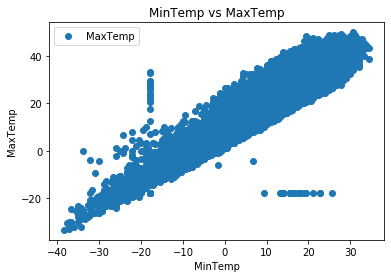

In [50]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

Let’s check the average max temperature and once we plot it we can observe that the Average Maximum Temperature is Between Nearly 25 and 35.

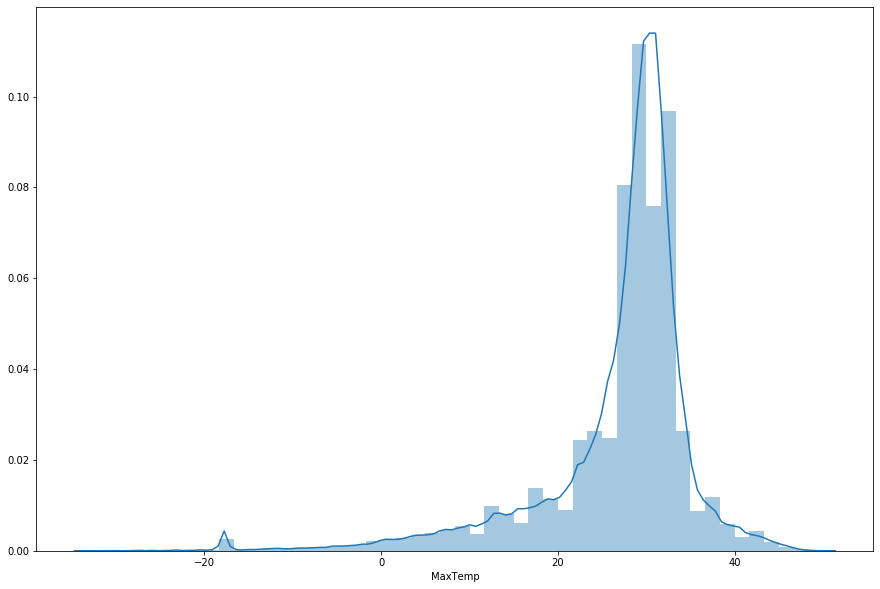

In [51]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(dataset['MaxTemp'])

Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [52]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [54]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [55]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


The result should be approximately 10.66185201 and
0.92033997 respectively.

This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [56]:
y_pred = regressor.predict(X_test)

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [57]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


We can also visualize comparison result as a bar graph using the below script :

Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

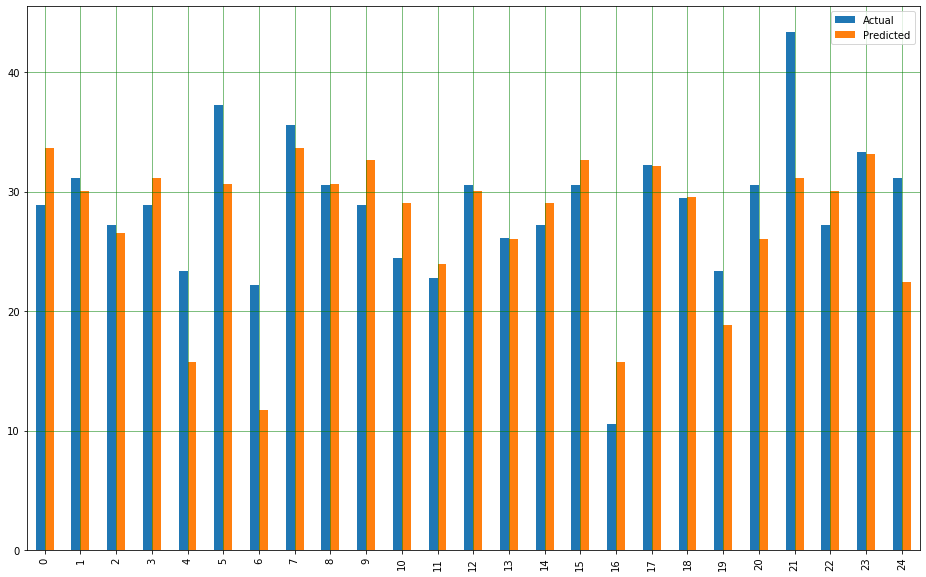

In [58]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

Let's plot our straight line with the test data :

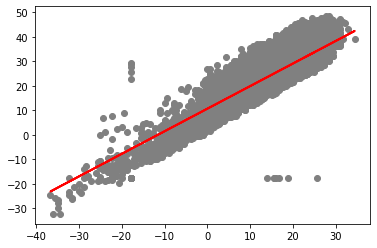

In [59]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors. It is calculated as:
![Mean Absolute Error Formula](images/MAE.png)
#### <center>Mean Absolute Error</center>


2. **Mean Squared Error (MSE)** is the mean of the squared errors and is calculated as:
![Mean Squared Error Formula](images/MSE.png)
#### <center>Mean Squared Error</center>

3. **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
![Root Mean Squared Error Formula](images/RMSE.gif )
#### <center>Root Mean Squared Error</center>

We don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

Let’s find the values for these metrics using our test data.

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785285
Mean Squared Error: 17.631568097568444
Root Mean Squared Error: 4.198996082109204


As you can see, the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.

### Example 5.2: Multiple Linear Regression

![Multiple Linear Regression](images/MultipleLinearRegression.png )
#### <center>Multiple Linear Regression</center>


We just performed linear regression in the above section (5.1) involving two variables. Almost all the real-world problems that you are going to encounter will have more than two variables. Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

In this section, I have downloaded red wine quality dataset. The dataset related to red variants of the Portuguese “Vinho Verde” wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Based on these features we will predict the quality of the wine.

Now, let's start our coding :

In [ ]:
#The following command imports the dataset from the file:
dataset = pd.read_csv('data/winequality.csv')

Let’s explore the data a little bit by checking the number of rows and columns in it.

In [ ]:
dataset.shape

To see the statistical details of the dataset, we can use describe():

In [ ]:
dataset.describe()

Let us clean our data little bit, So first check which are the columns the contains NaN values in it :

In [ ]:
dataset.isnull().any()

Once the above code is executed, all the columns should give False, In case for any column you find True result, then remove all the null values from that column using below code.

In [ ]:
dataset = dataset.fillna(method='ffill')

Our next step is to divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels.

In [ ]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
y = dataset['quality']

Let's check the average value of the “quality” column.

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(dataset['quality'])

As we can observe that most of the time the value is either 5 or 6.

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now lets train our model.

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

As said earlier, in the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

This means that for a unit increase in “density”, there is a decrease of 31.51 units in the quality of the wine. Similarly, a unit decrease in “Chlorides“ results in an increase of 1.87 units in the quality of the wine. We can see that the rest of the features have very little effect on the quality of the wine.

Now let's do prediction on test data.

In [ ]:
y_pred = regressor.predict(X_test)

Check the difference between the actual value and predicted value.

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

Now let's plot the comparison of Actual and Predicted values

In [ ]:
df.head(25).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

As we can observe here that our model has returned pretty good prediction results.

The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. Execute the following script:

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

You can see that the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63. This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, for example :

**Need more data**: We need to have a huge amount of data to get the best possible prediction.

**Bad assumptions**: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

**Poor features**: The features we used may not have had a high enough correlation to the values we were trying to predict.

#### Conclusion
In this article, we studied the most fundamental machine learning algorithms i.e. linear regression. We implemented both simple linear regression and multiple linear regression with the help of the Scikit-Learn machine learning library.